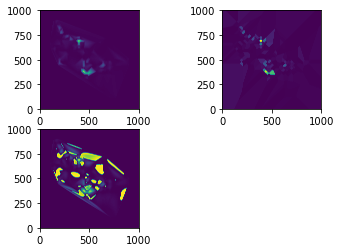

In [60]:
from pickletools import uint8
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


entitys = pd.read_csv('docs/entities.csv')

# entitys.info()
# entitys["x"]
# plt.plot(entitys["x"], entitys["y"], 'k.', ms=1)



points = np.column_stack((entitys["x"], entitys["y"]))
# points
# plt.imshow(points, extent=(0,1000,0,1000) )

values = entitys["frequency_norm"]
values
grid_x, grid_y = np.mgrid[0:1000:4096j, 0:1000:4096j]

# np.shape(grid_x)
# grid_x

linear = griddata(points, values, (grid_x, grid_y), method='linear', fill_value=0.0, rescale=True)
scale = 255.0/linear.max()
linearScaled = linear * scale 
# np.info(linearScaled)
linearScaled = linearScaled.astype('uint8')
# np.info(linearScaled)

# print(linearScaled)
plt.subplot(221)
plt.imshow(linearScaled, extent=(0,1000,0,1000))
img = Image.fromarray(linearScaled, 'L')
img.save('linear.png')
# img.show()


nearest = griddata(points, values, (grid_x, grid_y), method='nearest', fill_value=0.0,rescale=True)
scale = 255.0/nearest.max()
nearestScaled = nearest * scale 
# np.info(nearestScaled)
nearestScaled = nearestScaled.astype('uint8')
# np.info(nearestScaled)

# print(nearestScaled)
plt.subplot(222)
plt.imshow(nearestScaled, extent=(0,1000,0,1000))
img = Image.fromarray(nearestScaled, 'L')
img.save('nearest.png')
# img.show()


cubic = griddata(points, values, (grid_x, grid_y), method='cubic', fill_value=0.0,rescale=True)
scale = 255.0/cubic.max()
cubicScaled = cubic * scale 
# np.info(cubicScaled)
cubicScaled = cubicScaled.astype('uint8')
# np.info(cubicScaled)

# print(cubicScaled)
plt.subplot(223)
plt.imshow(cubicScaled, extent=(0,1000,0,1000))
img = Image.fromarray(cubicScaled, 'L')
img.save('cubic.png')
# img.show()



# Installation

conda install scipy 

conda install numpy=1.22

conda install matplotlib 

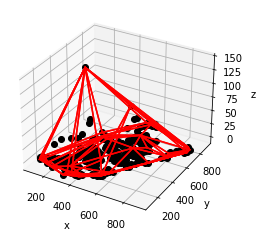

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull


pts = np.column_stack((entitys["x"], entitys["y"],entitys["slope"] ))

# 8 points defining the cube corners
# pts = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
#                 [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], ])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")

# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()


[[193  40 231]
 [ 55 185  38]
 [ 55  91 185]
 ...
 [157 151 189]
 [ 95 220 216]
 [ 62  95 216]]


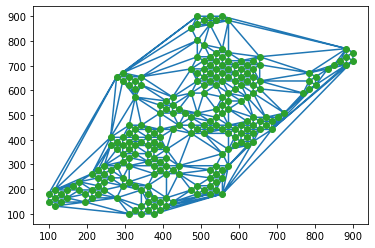

In [69]:
from scipy.spatial import Delaunay
points = np.column_stack((entitys["x"], entitys["y"] ))
# print(points)

tri = Delaunay(points)
print(tri.simplices)

import matplotlib.pyplot as plt

plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()